<a href="https://colab.research.google.com/github/agungrizkysetiawan/PCVK-Ganjil_2024/blob/main/AgungRizkyS_PCVK_Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUIZ 2 PCVK
KLASIFIKASI JENIS MAKANAN MENGGUNKAN MODEL CNN

NAMA : Agung Rizky S

KELAS : TI-3C

ABSEN : 01




1. Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download Dataset dengan KaggleHub

In [ ]:
import kagglehub
import os

# Download dataset dari Kaggle
path = kagglehub.dataset_download("kmader/food41")
data_dir = os.path.join(path, 'images')  # Path ke folder gambar dalam dataset

print("Path to dataset files:", data_dir)


100%|██████████| 5.30G/5.30G [00:23<00:00, 247MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kmader/food41/versions/5/images


3. Preprocessing dan Visualisasi Data

Folder untuk kategori 'ice_cream' ditemukan.
Folder untuk kategori 'sushi' ditemukan.
Folder untuk kategori 'chicken_wings' ditemukan.


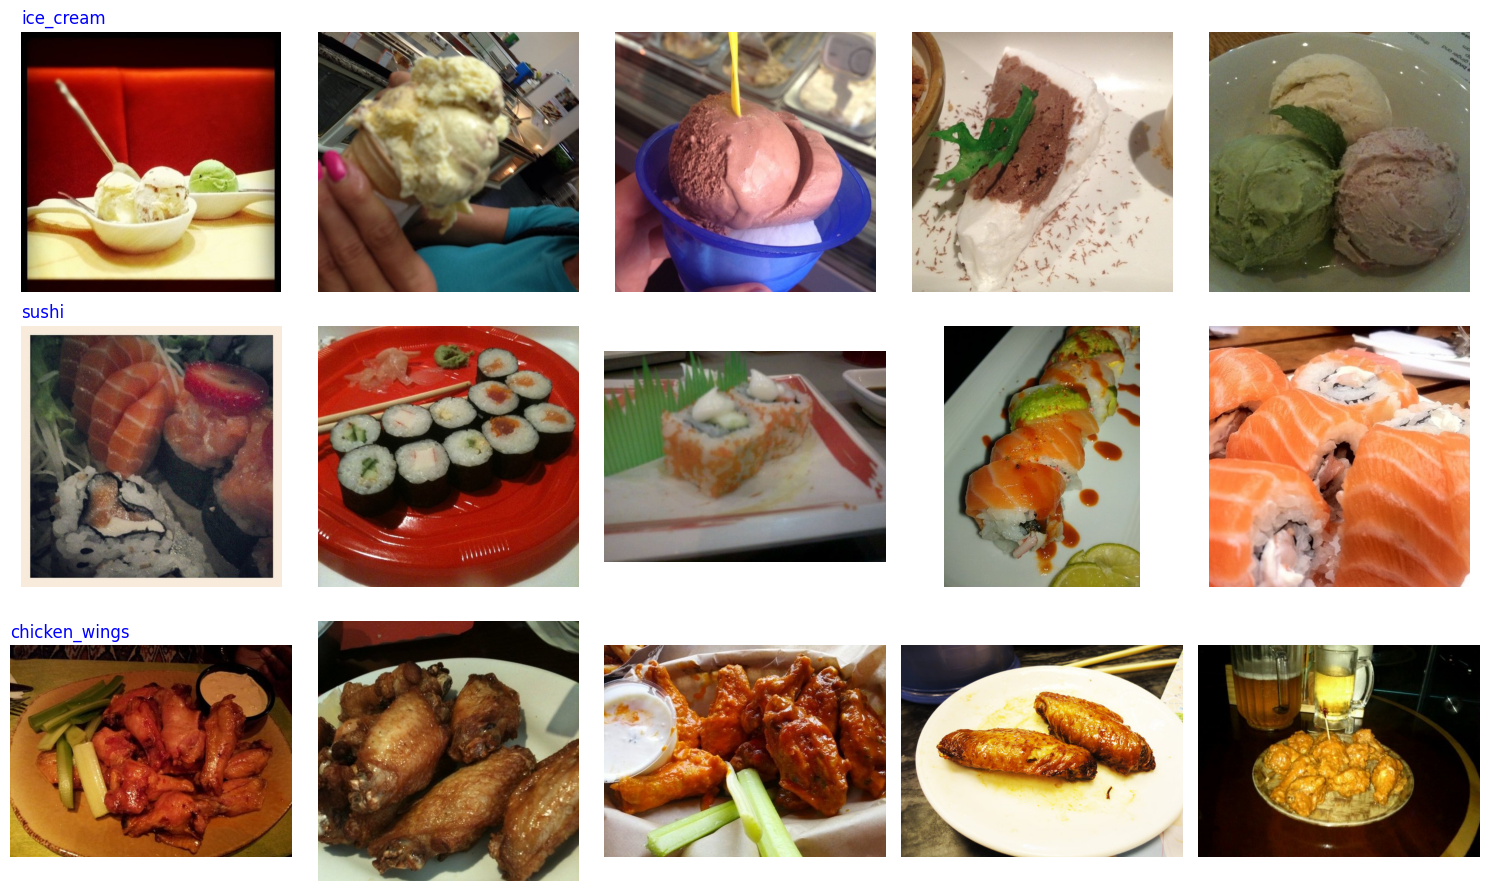

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

# Tentukan direktori dataset
data_dir = os.path.join(path, 'images')
categories = ['ice_cream', 'sushi', 'chicken_wings']  # Kategori gambar makanan yang digunakan

# Cek apakah folder kategori ada di dalam dataset
for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.exists(category_path):
        print(f"Folder untuk kategori '{category}' tidak ditemukan di {category_path}")
    else:
        print(f"Folder untuk kategori '{category}' ditemukan.")

# Setel ukuran gambar
img_size = (128, 128)  # Semua gambar akan diubah ukurannya menjadi 128x128
data = []
labels = []

# Memuat gambar dan mengonversinya menjadi array
for category in categories:
    category_path = os.path.join(data_dir, category)
    if os.path.exists(category_path):
        for img_file in os.listdir(category_path):
            try:
                img_path = os.path.join(category_path, img_file)
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                data.append(img_array)
                labels.append(categories.index(category))
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")
    else:
        print(f"Directory not found for category: {category}")

# Memvisualisasikan 5 gambar pertama dari setiap kategori dalam satu gambar
fig, axes = plt.subplots(len(categories), 5, figsize=(15, len(categories) * 3))

for idx, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    if os.path.exists(category_path):
        image_files = os.listdir(category_path)[:5]  # Ambil 5 gambar pertama
        for j, img_file in enumerate(image_files):
            img_path = os.path.join(category_path, img_file)
            image = Image.open(img_path)
            axes[idx, j].imshow(image)
            axes[idx, j].axis('off')
            if j == 0:
                axes[idx, j].set_title(category, loc='left', fontsize=12, color='blue')

plt.tight_layout()
plt.show()


4. Normalisasi dan Konversi Label ke One-Hot Encoding

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

#skala nilai pixel
X = np.array(data).astype('float32') / 255.0
#convert label ke format
y = to_categorical(np.array(labels), num_classes=len(categories))


5. Pembagian Data Latih dan Uji

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. Augmentasi Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#memperluas dataset secara virtual dan menghasilkan variasi gambar berbeda
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)


7. Arsitektur Model CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#klasifikasi gambar input dalam kategori
model = Sequential([
    #konvolusi mengekstraksi fitur dari gambar.
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    #pooling mengurangi ukuran data untuk meningkatkan efisiensi.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    #Mengubah data dari 3D ke 1D
    Flatten(),
    #Menghasilkan probabilitas kategori gambar.
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])


8. Kompilasi dan Pelatihan Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#melatih model CNN untuk klasifikasi gambar
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_food_model.keras', save_best_only=True, monitor='val_accuracy')

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/30
75/75 [==============================] - 14s 167ms/step - loss: 1.0644 - accuracy: 0.4683 - val_loss: 0.8730 - val_accuracy: 0.6083
Epoch 2/30
75/75 [==============================] - 12s 161ms/step - loss: 0.9037 - accuracy: 0.5683 - val_loss: 0.8401 - val_accuracy: 0.6367
Epoch 3/30
75/75 [==============================] - 12s 154ms/step - loss: 0.8631 - accuracy: 0.5863 - val_loss: 0.8544 - val_accuracy: 0.6133
Epoch 4/30
75/75 [==============================] - 12s 153ms/step - loss: 0.8664 - accuracy: 0.5838 - val_loss: 0.8753 - val_accuracy: 0.5983
Epoch 5/30
75/75 [==============================] - 12s 155ms/step - loss: 0.8530 - accuracy: 0.6029 - val_loss: 0.8006 - val_accuracy: 0.6300
Epoch 6/30
75/75 [==============================] - 12s 156ms/step - loss: 0.8234 - accuracy: 0.6192 - val_loss: 0.8066 - val_accuracy: 0.6250
Epoch 7/30
75/75 [==============================] - 12s 161ms/step - loss: 0.8055 - accuracy: 0.6400 - val_loss: 0.7730 - val_accuracy: 0.6567

9. Evaluasi Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


19/19 [==============================] - 1s 32ms/step - loss: 0.5208 - accuracy: 0.7867
Test accuracy: 0.7867


10. Confusion Matrix dan Laporan Klasifikasi

19/19 [==============================] - 1s 27ms/step


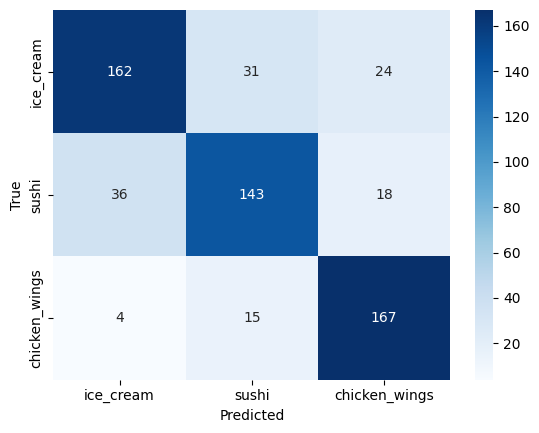

               precision    recall  f1-score   support

    ice_cream       0.80      0.75      0.77       217
        sushi       0.76      0.73      0.74       197
chicken_wings       0.80      0.90      0.85       186

     accuracy                           0.79       600
    macro avg       0.79      0.79      0.79       600
 weighted avg       0.79      0.79      0.79       600



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
#membandingkan hasil prediksi model dengan label sebenarnya.
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=categories))


11. Fungsi Prediksi Gambar Baru

1/1 [==============================] - 0s 30ms/step


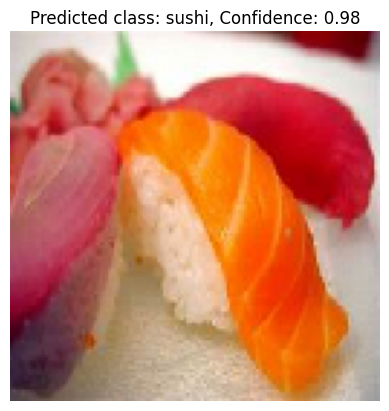

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_food(image_path, threshold=0.7):
    # Load dan preprocess gambar
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediksi kelas gambar
    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Jika confidence di bawah threshold, tampilkan hasil "tidak masuk kategori"
    if confidence < threshold:
        predicted_class = "Tidak masuk kategori"

    # Tampilkan gambar beserta hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predicted_class, confidence = predict_food('/content/drive/MyDrive/PCVK/quiz2/img1.jpg')


1/1 [==============================] - 0s 31ms/step


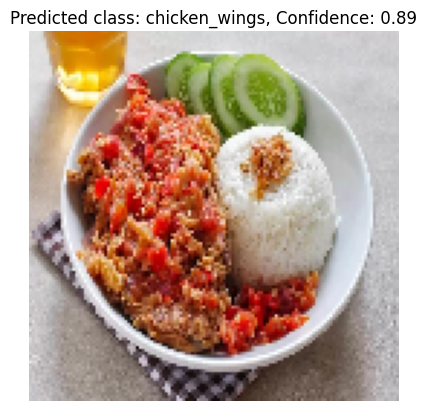

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_food(image_path, threshold=0.7):
    # Load dan preprocess gambar
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediksi kelas gambar
    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Jika confidence di bawah threshold, tampilkan hasil "tidak masuk kategori"
    if confidence < threshold:
        predicted_class = "Tidak masuk kategori"

    # Tampilkan gambar beserta hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predicted_class, confidence = predict_food('/content/drive/MyDrive/PCVK/quiz2/img2.jpg')


1/1 [==============================] - 0s 30ms/step


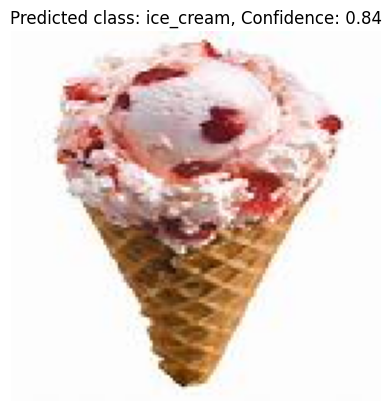

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_food(image_path, threshold=0.7):
    # Load dan preprocess gambar
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediksi kelas gambar
    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Jika confidence di bawah threshold, tampilkan hasil "tidak masuk kategori"
    if confidence < threshold:
        predicted_class = "Tidak masuk kategori"

    # Tampilkan gambar beserta hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predicted_class, confidence = predict_food('/content/drive/MyDrive/PCVK/quiz2/img3.jpg')


1/1 [==============================] - 0s 30ms/step


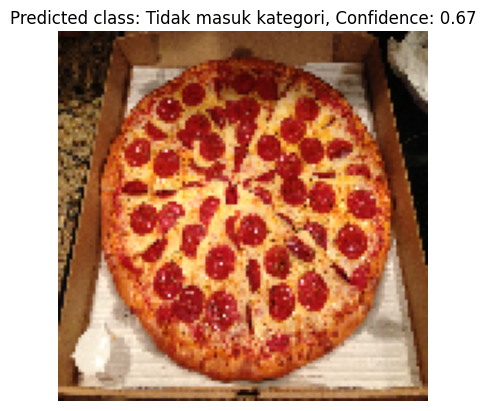

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_food(image_path, threshold=0.7):
    # Load dan preprocess gambar
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediksi kelas gambar
    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Jika confidence di bawah threshold, tampilkan hasil "tidak masuk kategori"
    if confidence < threshold:
        predicted_class = "Tidak masuk kategori"

    # Tampilkan gambar beserta hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predicted_class, confidence = predict_food('/content/drive/MyDrive/PCVK/quiz2/img4.jpg')
